In [2]:
import numpy as np
import cv2
from PIL import Image
from pytesseract import pytesseract, Output
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image
from langdetect import detect_langs
%matplotlib inline

In [3]:
font = './fonts/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf'

def write_text(img, text, x, y, font, color=(50, 50, 255), font_size = 32):
    font = ImageFont.truetype(font, font_size)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x, y - font_size), text, font = font, fill = color)
    img_tmp = np.array(img_pil)
    return img_tmp

def bounding_box(result, img, i, color = (0, 255, 0)):
    x = result['left'][i]
    y = result['top'][i]
    width = result['width'][i]
    height = result['height'][i]

    cv2.rectangle(img, (x, y), (x + width, y + height), color, 2)

    return x, y, img
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(11.69,8.27), dpi=300) # A4 사이즈
    # fig = plt.figure(figsize=(16.53, 11.69), dpi=300)
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [4]:
img = cv2.imread('./images/IMG_ESC200507005_REQ_2_0.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [5]:
!tesseract --help-oem

OCR Engine modes:
  0    Legacy engine only.
  1    Neural nets LSTM engine only.
  2    Legacy + LSTM engines.
  3    Default, based on what is available.


In [6]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


In [7]:
config_tessract = r'--tessdata-dir ./tesstrain/data --psm 11 --oem 3 -l NanumGothic+eng --loglevel ALL'
result = pytesseract.image_to_data(img, config=config_tessract, output_type=Output.DICT)
txt = pytesseract.image_to_string(img, config=config_tessract)
print(result['text'])
detect_langs(txt)

['', '', '', '', '견', '적', '의', '뢰', '서', '', '', '', '거', '래', '처', ':', '서', '신', '엔', '지', '니', '어', '링', '', '', '', '의', '뢰', '번', '호', ':', 'T-200507005', '', '', '', ':2020-05-07', '', '', '', '수', '신', ':', '서', '성', '용', '부', '장', '님', '', '', '', '의', '뢰', '일', '자', '', '', '', 'TEL:', '070-4125-4311', '', '', '', '담', '당', '자', ':', '정', '문', '희', '영', '업', '팀', '', '', '', 'FAX:', '', '', '', 'HULL', 'NO.', ':', '$3109', '', '', '', '귀', '사', '의', '무', '궁', '한', '', '', '', '박', '저', '을', '', '', '', '22', '', '', '', '기', '원', '합', '니', '다', '', '', '', '아', '래', '와', '같', '이', '견', '적', '의', '뢰', '를', '하', '오', '니', '검', '토', '하', '신', '후', '빠', '른', '회', '신', '바', '랍', '니', '다', '.', '', '', '', '해', '당', '품', '목', '중', '전', '략', '물', '자', '로', '고', '시', '된', '품', '', '', '', '2', '', '', '', '=', '', '', '', '사', '전', 'SE', '해', '주', '시', '기', '바', '랍', '니', '다', '.', '', '', '', 'PART', 'NO', '', '', '', 'AMOUNT', '', '', '', 'NO.DESCRIPTION', '', '', '', 'QTY', 'UNIT'

[ko:0.9999983343088308]

: (-1)
: (-1)
: (-1)
: (-1)
견: (92)
적: (91)
의: (93)
뢰: (93)
서: (91)
: (-1)
: (-1)
: (-1)
거: (93)
래: (93)
처: (93)
:: (92)
서: (92)
신: (93)
엔: (93)
지: (93)
니: (92)
어: (93)
링: (93)
: (-1)
: (-1)
: (-1)
의: (92)
뢰: (92)
번: (93)
호: (91)
:: (57)
T-200507005: (89)
: (-1)
: (-1)
: (-1)
:2020-05-07: (90)
: (-1)
: (-1)
: (-1)
수: (93)
신: (92)
:: (90)
서: (90)
성: (93)
용: (49)
부: (49)
장: (93)
님: (93)
: (-1)
: (-1)
: (-1)
의: (93)
뢰: (93)
일: (93)
자: (93)
: (-1)
: (-1)
: (-1)
TEL:: (71)
070-4125-4311: (86)
: (-1)
: (-1)
: (-1)
담: (93)
당: (93)
자: (93)
:: (90)
정: (90)
문: (93)
희: (93)
영: (93)
업: (93)
팀: (93)
: (-1)
: (-1)
: (-1)
FAX:: (83)
: (-1)
: (-1)
: (-1)
HULL: (95)
NO.: (91)
:: (88)
$3109: (43)
: (-1)
: (-1)
: (-1)
귀: (93)
사: (93)
의: (93)
무: (93)
궁: (93)
한: (93)
: (-1)
: (-1)
: (-1)
박: (76)
저: (90)
을: (17)
: (-1)
: (-1)
: (-1)
22: (32)
: (-1)
: (-1)
: (-1)
기: (92)
원: (93)
합: (93)
니: (93)
다: (93)
: (-1)
: (-1)
: (-1)
아: (93)
래: (93)
와: (87)
같: (87)
이: (93)
견: (93)
적: (93)
의: (93)
뢰: (92)
를: (93)
하: (93

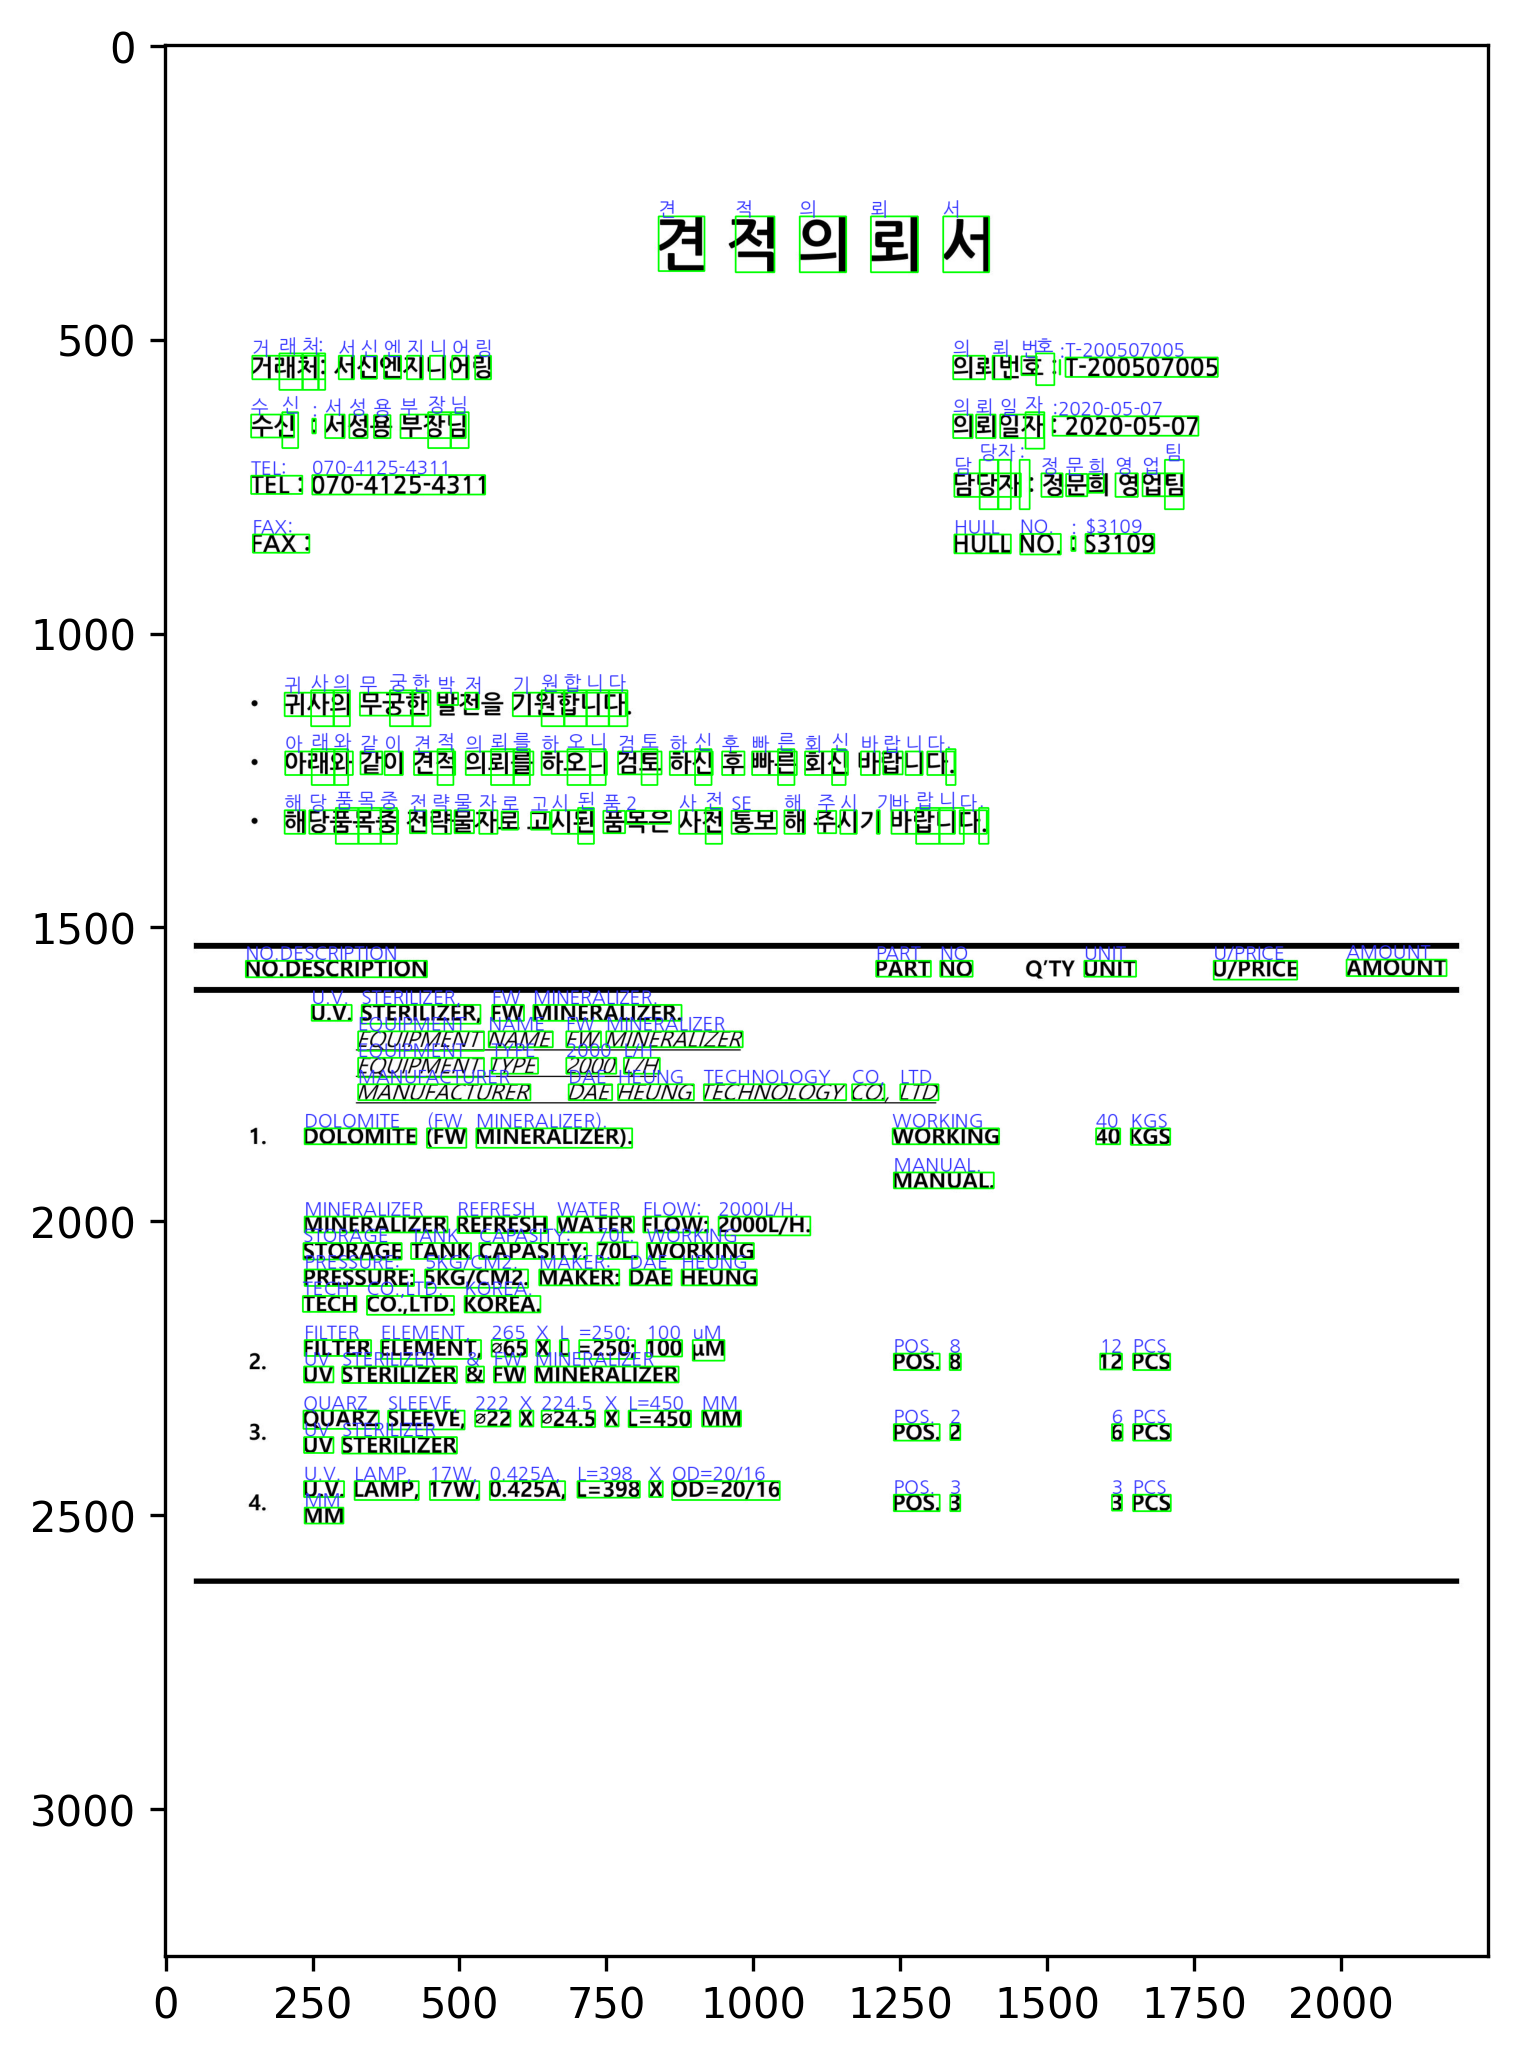

In [8]:
img_copy = img.copy()

min_confidence = 40

for i in range(0, len(result['text'])):
    # print(i)
    confidence = int(result['conf'][i])
    text = result['text'][i]
    # print(confidence)
    if confidence > min_confidence:
        # print(confidence)
        x, y, img = bounding_box(result, img_copy, i)
        # print(x, y)
        # print(text)
        img_copy = write_text(img_copy, f'{text}', x, y, font)

    print(f'{text}: ({confidence})')

display(img_copy)

In [9]:
!tesseract --list-langs

List of available languages in "/usr/local/share/tessdata/" (0):
